In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[8,3]

In [41]:
train=pd.read_csv('./customer_churn_dataset-training-master.csv')
train.shape

(440833, 12)

In [42]:
test=pd.read_csv('./customer_churn_dataset-testing-master.csv')
test.shape

(64374, 12)

In [43]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [44]:
test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [45]:
def drop_column(df, column):
    df=df.drop(column, axis=1)
    return df

In [46]:
train=drop_column(train, 'CustomerID')
train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [47]:
test=drop_column(test, 'CustomerID')
test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [48]:
df=pd.concat([train, test], axis=0)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [49]:
df.shape

(505207, 11)

In [50]:
df=df.dropna()
df.shape

(505206, 11)

In [51]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [52]:
def categorical_viz(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col, data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie', autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()

def numerical_viz(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col, data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.tight_layout()
    plt.show()

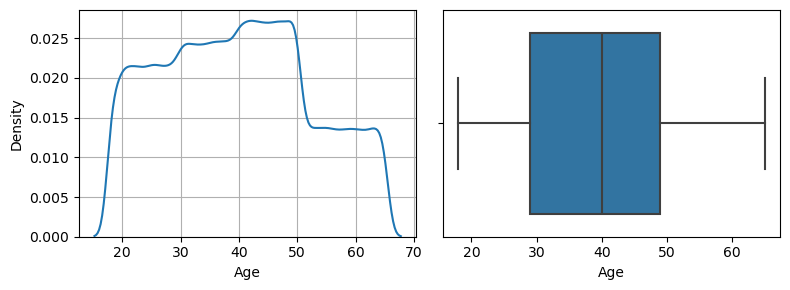

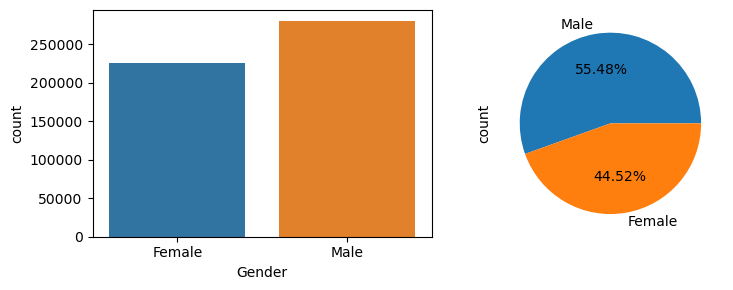

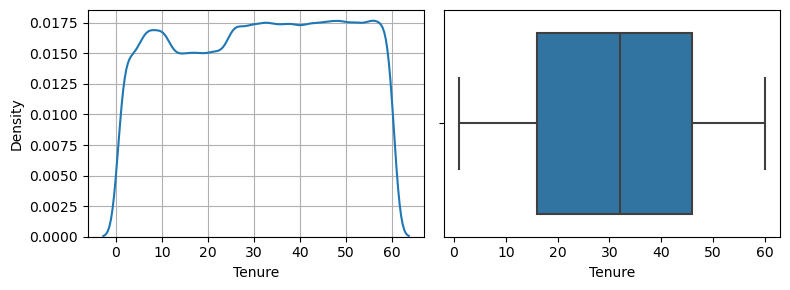

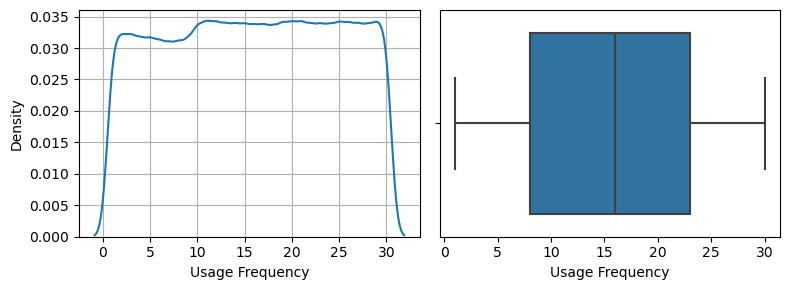

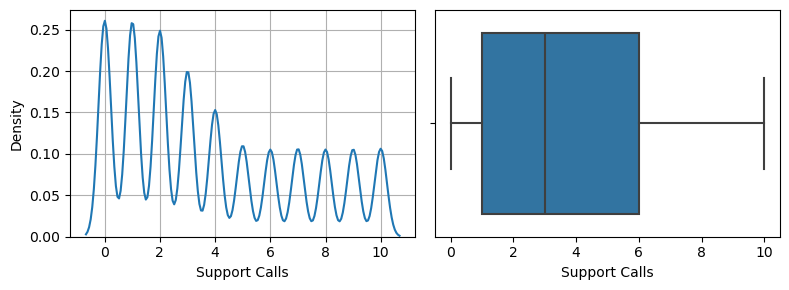

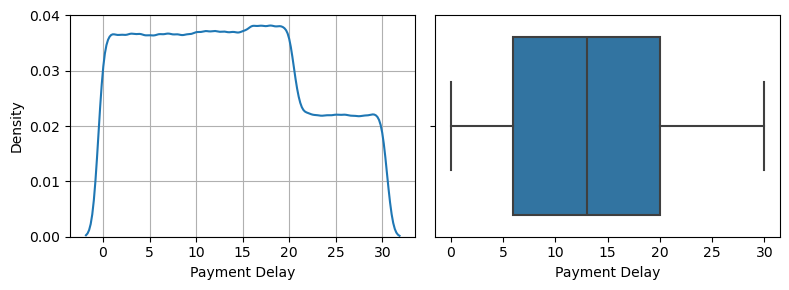

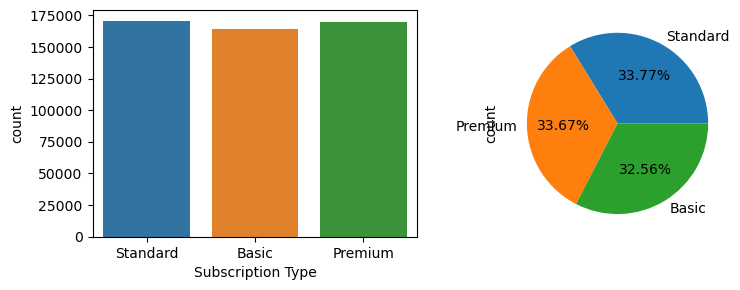

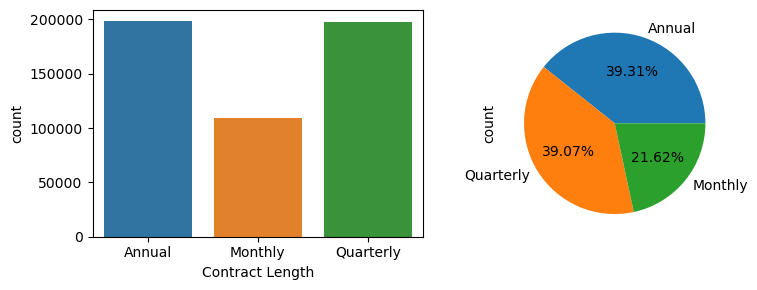

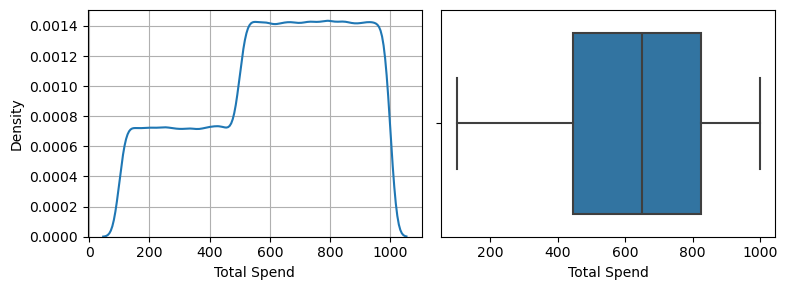

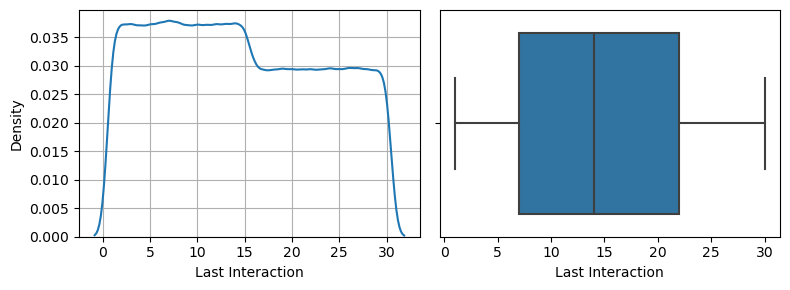

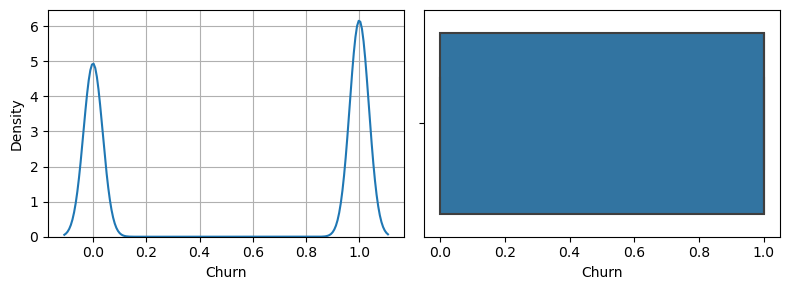

In [53]:
for col in df.columns:
    if df[col].dtype=='object':
        categorical_viz(col)
    else:
        numerical_viz(col)

In [54]:
y=df['Churn']
x=df.drop('Churn', axis=1)

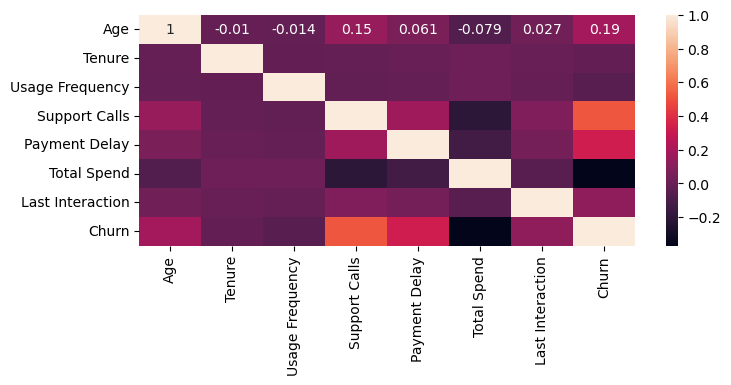

In [55]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

In [56]:
for i in x.select_dtypes(include='object').columns:
    print(x[i].value_counts())
    print('\n')

Gender
Male      280273
Female    224933
Name: count, dtype: int64


Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64


Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64




In [57]:
for i in x.select_dtypes(include='object').columns:
    x[i]=x[i].map(x[i].value_counts(normalize=True))

In [58]:
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0.44523,39.0,14.0,5.0,18.0,0.337743,0.393123,932.0,17.0
1,65.0,0.44523,49.0,1.0,10.0,8.0,0.325564,0.216217,557.0,6.0
2,55.0,0.44523,14.0,4.0,6.0,18.0,0.325564,0.390660,185.0,3.0
3,58.0,0.55477,38.0,21.0,7.0,7.0,0.337743,0.216217,396.0,29.0
4,23.0,0.55477,32.0,20.0,5.0,8.0,0.325564,0.216217,617.0,20.0


<Axes: >

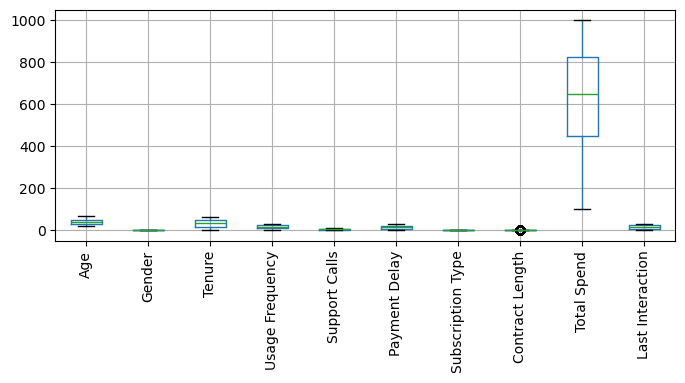

In [59]:
x.boxplot(rot=90)

In [60]:
from sklearn.preprocessing import MinMaxScaler
mmax=MinMaxScaler()
x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']]=mmax.fit_transform(x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']])
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,0.255319,0.44523,0.644068,0.448276,0.5,0.600000,0.337743,0.393123,0.924444,0.551724
1,1.000000,0.44523,0.813559,0.000000,1.0,0.266667,0.325564,0.216217,0.507778,0.172414
2,0.787234,0.44523,0.220339,0.103448,0.6,0.600000,0.325564,0.390660,0.094444,0.068966
3,0.851064,0.55477,0.627119,0.689655,0.7,0.233333,0.337743,0.216217,0.328889,0.965517
4,0.106383,0.55477,0.525424,0.655172,0.5,0.266667,0.325564,0.216217,0.574444,0.655172


In [61]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

<Axes: >

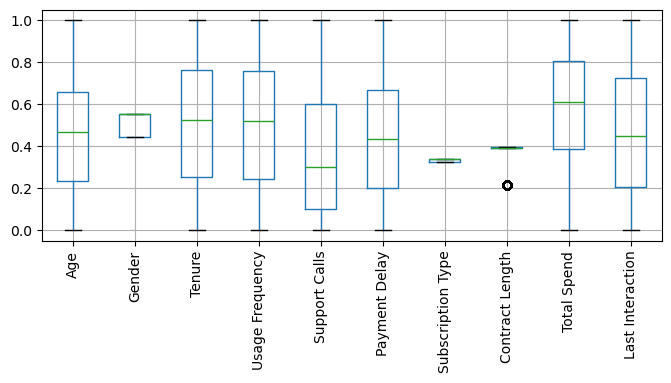

In [62]:
x.boxplot(rot=90)

In [63]:
y.value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

In [64]:
y.shape[0]

505206

In [65]:
x.shape[0]

505206

In [66]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.Logit(y, xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.389162
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               505206
Model:                          Logit   Df Residuals:                   505195
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 Aug 2024   Pseudo R-squ.:                  0.4336
Time:                        09:22:20   Log-Likelihood:            -1.9661e+05
converged:                       True   LL-Null:                   -3.4710e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.4221      0.249     33.805      0.000       7.934       8.910
Age     

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [70]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [73]:
def predictor(model):
    print(model)
    model.fit(xtrain, ytrain)
    y_pred_train=model.predict(xtrain)
    y_pred_test=model.predict(xtest)
    print("Training accuracy: ", accuracy_score(ytrain, y_pred_train))
    print("ROC score for train data: ", roc_auc_score(ytrain, y_pred_train))
    fpr, tpr, thresholds=roc_curve(ytrain, model.predict_proba(xtrain)[:,1])
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1])
    plt.grid()
    plt.show()
    print('--'*25)
    print("Testing accuracy: ", accuracy_score(ytest, y_pred_test))
    print("ROC score for test data: ", roc_auc_score(ytest, y_pred_test))
    fpr, tpr, thresholds=roc_curve(ytest, model.predict_proba(xtest)[:,1])
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1])
    plt.grid()
    plt.show()

LogisticRegression()
Training accuracy:  0.8490402777934872
ROC score for train data:  0.8489504394706991


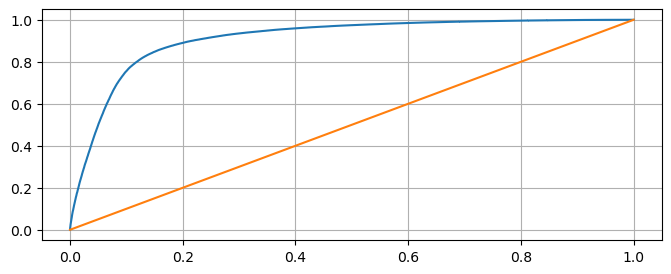

--------------------------------------------------
Testing accuracy:  0.8469141341497209
ROC score for test data:  0.846775616925102


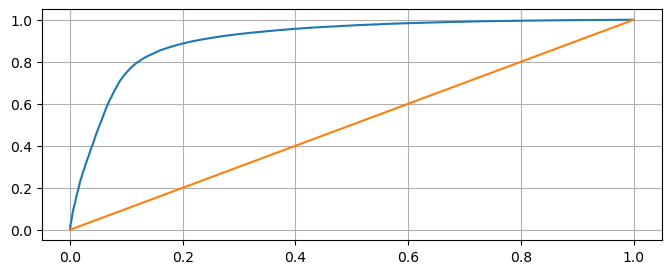

In [74]:
predictor(lr)

DecisionTreeClassifier()
Training accuracy:  1.0
ROC score for train data:  1.0


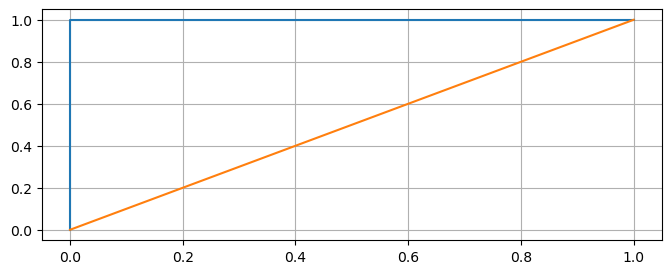

--------------------------------------------------
Testing accuracy:  0.8822264155922989
ROC score for test data:  0.88194645881335


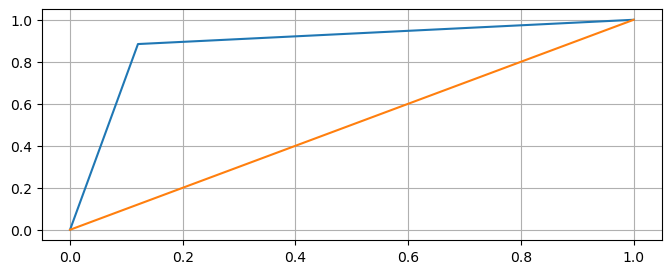

In [75]:
predictor(dt)

RandomForestClassifier()
Training accuracy:  1.0
ROC score for train data:  1.0


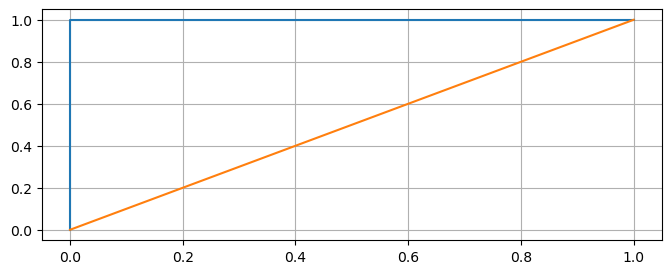

--------------------------------------------------
Testing accuracy:  0.9351750438764334
ROC score for test data:  0.927028229013615


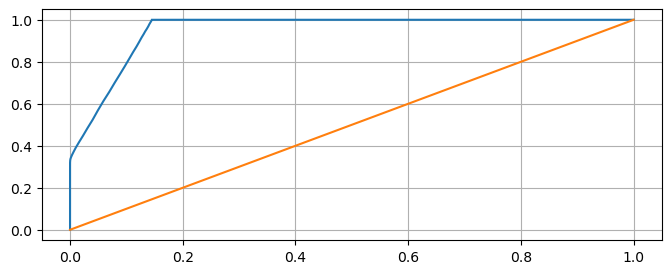

In [77]:
predictor(rf)

DecisionTreeClassifier()
Training accuracy:  1.0
ROC score for train data:  1.0


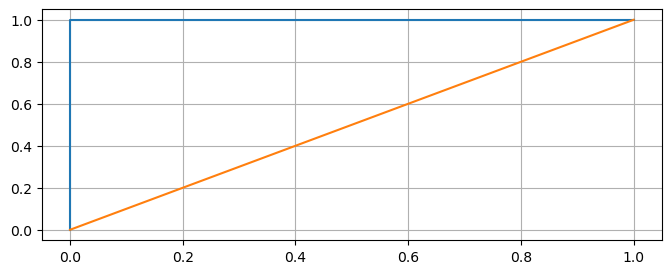

--------------------------------------------------
Testing accuracy:  0.8828400258640029
ROC score for test data:  0.882493248421239


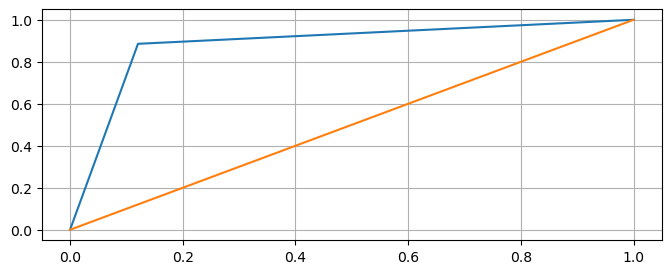

In [78]:
predictor(dt)

KNeighborsClassifier()
Training accuracy:  0.9167100247706733
ROC score for train data:  0.9137506821761847


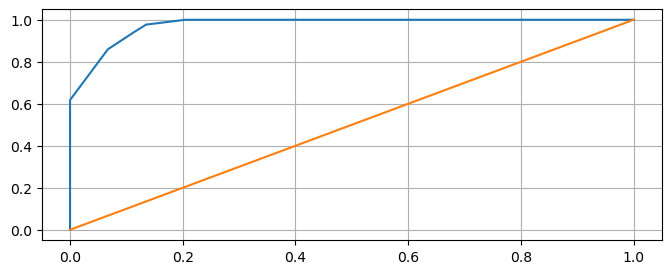

--------------------------------------------------
Testing accuracy:  0.8953497578548713
ROC score for test data:  0.8929689061698799


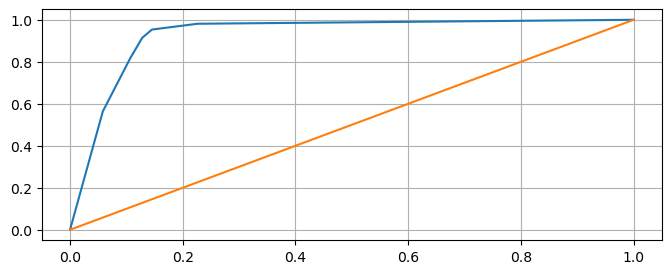

In [79]:
predictor(knn)

GaussianNB()
Training accuracy:  0.8604981280609879
ROC score for train data:  0.8635529417094348


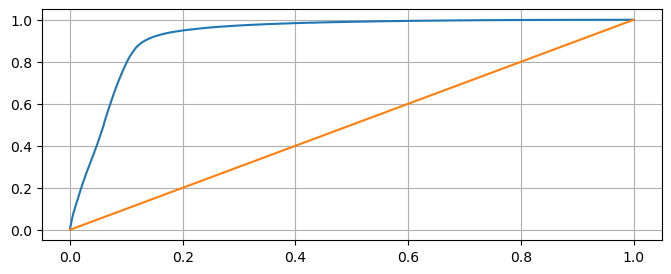

--------------------------------------------------
Testing accuracy:  0.8577479843232473
ROC score for test data:  0.8608016641266573


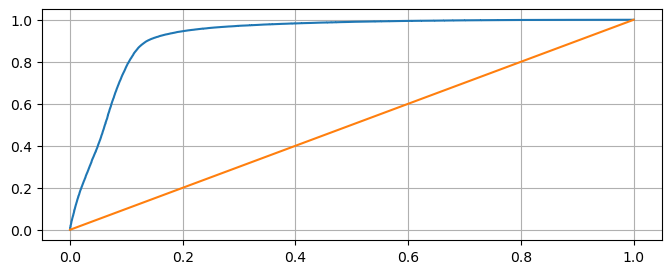

In [80]:
predictor(gnb)